In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import dofusdb.dist_func as dist
import dofusdb.sql_loader as sql
from graphviz import Digraph, Graph

In [2]:
db = sql.database('dofusdb.sqlite')
subarea_dict_sql = db.load_all_subarea()

In [3]:
dist_all = dist.compute_distance_df(subarea_dict_sql, dist.grav_to_grav_eucl)
dist_all

,Port de Madrestam,Montagne des Craqueleurs,Champ des Ingalsse,Forêt d'Amakna,Coin des Bouftous,Cimetière,Cryptes du cimetière,Campement des Bworks,Dédale du Dark Vlad,Village d'Amakna,...,Futaie enneigée,Galeries d'Ereboria,Bastion des Marteaux-Aigris,Ephedrya,Chambre des maléfices,Ereboria,Imaginarium,Ecaflip City,Dimension Éphémère,Ligue d'Osatopia
Port de Madrestam,0.0,25.894015,17.492856,24.909837,15.305228,19.235384,22.901965,29.094673,33.81198,19.608672,...,79.738636,10000,10000,81.038571,85.211502,67.896981,23.194827,10000,10000,37.566608
Montagne des Craqueleurs,25.894015,0.0,11.42366,18.027756,14.39618,6.670832,18.439089,5.385165,16.530275,7.28011,...,91.919802,10000,10000,89.96805,94.881505,80.277643,2.915476,10000,10000,15.91383
Champ des Ingalsse,17.492856,11.42366,0.0,10.511898,3.041381,7.211103,9.617692,12.509996,16.62077,4.301163,...,92.180529,10000,10000,91.685604,96.317184,80.324343,10.0,10000,10000,26.911893
Forêt d'Amakna,24.909837,18.027756,10.511898,0.0,10.59481,16.867128,2.236068,15.620499,11.101802,13.341664,...,102.343783,10000,10000,102.099216,106.6888,90.468226,18.124569,10000,10000,33.737961
Coin des Bouftous,15.305228,14.39618,3.041381,10.59481,0.0,9.552487,9.124144,15.5,18.506756,7.158911,...,91.760558,10000,10000,91.654242,96.199012,79.882727,12.776932,10000,10000,29.681644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ereboria,67.896981,80.277643,80.324343,90.468226,79.882727,76.157731,88.940992,85.641695,95.656939,79.199116,...,11.884864,10000,10000,16.378339,18.681542,0.0,77.820306,10000,10000,77.228557
Imaginarium,23.194827,2.915476,10.0,18.124569,12.776932,4.0,18.179659,7.905694,18.337121,5.700877,...,89.505586,10000,10000,87.785249,92.655275,77.820306,0.0,10000,10000,16.918924
Ecaflip City,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,0.0,10000,10000
Dimension Éphémère,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,0.0,10000


In [4]:
dist_all['Aerdala']['Port de Madrestam']

np.float64(25.124689052802225)

In [6]:
zones_to_graph = ['Lac',
 'Forêt',
 'Champs',
 'Pâturages',
 'Route des âmes',]

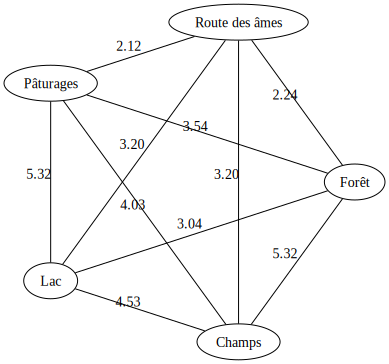

In [10]:
dot = Graph(comment='incarnam distances', engine='circo')
for i,from_zone in enumerate(zones_to_graph):
    dot.node(from_zone)
    for to_zone in zones_to_graph[i+1:]:
        dot.edge(from_zone, to_zone, f"{dist_all.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_grav_center_man')
dot

In [11]:
dist_all_mean_center = dist.compute_distance_df(subarea_dict_sql, dist.mean_manhattan_to_grav)
dist_all_mean_center

,Port de Madrestam,Montagne des Craqueleurs,Champ des Ingalsse,Forêt d'Amakna,Coin des Bouftous,Cimetière,Cryptes du cimetière,Campement des Bworks,Dédale du Dark Vlad,Village d'Amakna,...,Futaie enneigée,Galeries d'Ereboria,Bastion des Marteaux-Aigris,Ephedrya,Chambre des maléfices,Ereboria,Imaginarium,Ecaflip City,Dimension Éphémère,Ligue d'Osatopia
Port de Madrestam,16.1125,15.8875,11.6375,22.4,11.6125,8.7875,20.7125,22.6625,33.1625,11.4,...,106.8375,10000,10000,97.8375,105.3375,92.3375,12.2125,10000,10000,30.475
Montagne des Craqueleurs,28.102564,9.641026,21.692308,31.538462,25.179487,11.846154,32.538462,15.576923,26.25641,15.75641,...,114.320513,10000,10000,105.320513,112.820513,99.820513,8.358974,10000,10000,15.974359
Champ des Ingalsse,23.75,15.375,3.0,12.145833,4.208333,10.375,11.25,14.333333,23.75,6.458333,...,116.25,10000,10000,107.25,114.75,101.75,14.375,10000,10000,37.875
Forêt d'Amakna,37.351064,23.393617,14.053191,5.989362,15.914894,19.542553,7.414894,20.351064,12.287234,15.914894,...,129.851064,10000,10000,120.851064,128.351064,115.351064,22.56383,10000,10000,45.851064
Coin des Bouftous,32.128205,13.410256,8.384615,11.615385,10.910256,11.25641,12.615385,10.666667,15.371795,8.051282,...,124.628205,10000,10000,115.628205,123.128205,110.128205,12.384615,10000,10000,35.884615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ereboria,73.0,97.8,93.4,104.3,91.5,90.6,101.7,104.8,115.3,93.7,...,24.7,10000,10000,31.8,33.0,12.0,93.8,10000,10000,100.2
Imaginarium,26.0,4.0,14.0,24.0,17.5,4.0,25.0,11.0,21.5,8.0,...,118.5,10000,10000,109.5,117.0,104.0,0.0,10000,10000,23.5
Ecaflip City,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,2.722222,10000,10000
Dimension Éphémère,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,4.0,10000


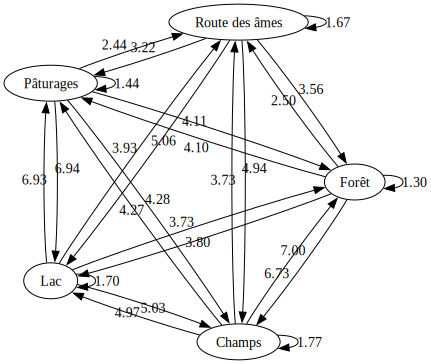

In [12]:
dot = Digraph(comment='incarnam distances', engine='circo')
for from_zone in zones_to_graph:
    dot.node(from_zone)
    for to_zone in zones_to_graph:
        dot.edge(from_zone, to_zone,f"{dist_all_mean_center.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_mean_center_man')
dot

In [13]:
dist_all_mean = dist.compute_distance_df(subarea_dict_sql, dist.mean_all_manhattan, is_sym=True)
dist_all_mean

In [23]:
dot = Graph(comment='incarnam distances', engine='circo')
for i,from_zone in enumerate(zones_to_graph):
    dot.node(from_zone)
    for to_zone in zones_to_graph[i+1:]:
        dot.edge(from_zone, to_zone, f"{dist_all_mean.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_mean_man')
dot

'distance_viz\\inc_dist_mean_all.pdf'

In [5]:
dist_max_man = dist.compute_distance_df(subarea_dict_sql, dist.max_all_manhattan)
dist_max_man

,Port de Madrestam,Montagne des Craqueleurs,Champ des Ingalsse,Forêt d'Amakna,Coin des Bouftous,Cimetière,Cryptes du cimetière,Campement des Bworks,Dédale du Dark Vlad,Village d'Amakna,...,Futaie enneigée,Galeries d'Ereboria,Bastion des Marteaux-Aigris,Ephedrya,Chambre des maléfices,Ereboria,Imaginarium,Ecaflip City,Dimension Éphémère,Ligue d'Osatopia
Port de Madrestam,27,37,25,54,35,NaN,31,37,50,33,...,128,110,100,121,121,111,NaN,NaN,NaN,NaN
Montagne des Craqueleurs,37,26,35,57,34,NaN,44,23,36,36,...,138,120,110,131,131,121,NaN,NaN,NaN,NaN
Champ des Ingalsse,25,35,9,38,19,NaN,18,21,34,25,...,126,108,98,119,119,109,NaN,NaN,NaN,NaN
Forêt d'Amakna,54,57,38,32,35,NaN,27,42,32,47,...,155,137,127,148,148,138,NaN,NaN,NaN,NaN
Coin des Bouftous,35,34,19,35,16,NaN,22,19,31,24,...,136,118,108,129,129,119,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ereboria,111,121,109,138,119,NaN,115,121,134,117,...,124,107,96,117,117,107,NaN,NaN,NaN,NaN
Imaginarium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
Ecaflip City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,9,88
Dimension Éphémère,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,93


In [6]:
dot = Graph(comment='incarnam distances', engine='circo')
for i,from_zone in enumerate(zones_to_graph):
    dot.node(from_zone)
    for to_zone in zones_to_graph[i+1:]:
        dot.edge(from_zone, to_zone, f"{dist_max_man.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_max_man')
dot

'distance_viz\\inc_dist_grav_center.pdf'

In [7]:
dist_mean_eucl = dist.compute_distance_df(subarea_dict_sql, dist.mean_all_eucl)
dist_mean_eucl

,Port de Madrestam,Montagne des Craqueleurs,Champ des Ingalsse,Forêt d'Amakna,Coin des Bouftous,Cimetière,Cryptes du cimetière,Campement des Bworks,Dédale du Dark Vlad,Village d'Amakna,...,Futaie enneigée,Galeries d'Ereboria,Bastion des Marteaux-Aigris,Ephedrya,Chambre des maléfices,Ereboria,Imaginarium,Ecaflip City,Dimension Éphémère,Ligue d'Osatopia
Port de Madrestam,5.603087,12.498055,9.548048,20.158409,13.761948,NaN,18.198975,17.500918,24.513803,9.686829,...,84.007284,62.089917,65.755353,60.674565,87.93466,65.830038,NaN,NaN,NaN,NaN
Montagne des Craqueleurs,12.498055,4.249021,15.952407,24.177247,16.272193,NaN,24.3978,13.333661,24.208032,8.650728,...,85.082916,63.069879,67.231502,59.302013,87.712482,66.798699,NaN,NaN,NaN,NaN
Champ des Ingalsse,9.548048,15.952407,3.250175,11.737918,6.775779,NaN,9.693217,13.990997,17.240746,9.038236,...,92.266578,69.530681,73.98253,66.597969,96.328967,73.266711,NaN,NaN,NaN,NaN
Forêt d'Amakna,20.158409,24.177247,11.737918,5.998525,8.94582,NaN,6.236198,15.563004,10.411809,16.752182,...,103.422383,80.327486,85.138846,76.64708,107.496176,84.059591,NaN,NaN,NaN,NaN
Coin des Bouftous,13.761948,16.272193,6.775779,8.94582,3.597583,NaN,9.464668,9.354278,11.51508,9.256751,...,96.995363,73.800093,78.768079,69.395207,100.661053,77.547741,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ereboria,65.830038,66.798699,73.266711,84.059591,77.547741,NaN,81.605612,78.398993,88.11353,70.63809,...,20.008227,17.749279,12.908413,38.388677,26.433749,15.501166,NaN,NaN,NaN,NaN
Imaginarium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Ecaflip City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.986524,3.750242,36.052526
Dimension Éphémère,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750242,2.69325,35.360631


In [9]:
dot = Graph(comment='incarnam distances', engine='circo')
for i,from_zone in enumerate(zones_to_graph):
    dot.node(from_zone)
    for to_zone in zones_to_graph[i+1:]:
        dot.edge(from_zone, to_zone, f"{dist_mean_eucl.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_mean_eucl')
dot

'distance_viz\\inc_dist_max_eucl.pdf'

In [10]:
dist_max_eucl = dist.compute_distance_df(subarea_dict_sql, dist.max_all_eucl)
dot = Graph(comment='incarnam distances', engine='circo')
for i,from_zone in enumerate(zones_to_graph):
    dot.node(from_zone)
    for to_zone in zones_to_graph[i+1:]:
        dot.edge(from_zone, to_zone, f"{dist_max_eucl.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_max_eucl')
dot

'distance_viz\\inc_dist_max_eucl.pdf'

In [11]:
dist_grav_eucl = dist.compute_distance_df(subarea_dict_sql, dist.grav_to_grav_eucl)
dot = Graph(comment='incarnam distances', engine='circo')
for i,from_zone in enumerate(zones_to_graph):
    dot.node(from_zone)
    for to_zone in zones_to_graph[i+1:]:
        dot.edge(from_zone, to_zone, f"{dist_grav_eucl.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_grav_eucl')
dot

'distance_viz\\inc_dist_grav_eucl.pdf'

In [12]:
dist_mean_grav_eucl = dist.compute_distance_df(subarea_dict_sql, dist.mean_eucl_to_grav)
dot = Digraph(comment='incarnam distances', engine='circo')
for from_zone in zones_to_graph:
    dot.node(from_zone)
    for to_zone in zones_to_graph:
        dot.edge(from_zone, to_zone,f"{dist_mean_grav_eucl.loc[from_zone, to_zone]:.2f}")
# dot.render('distance_viz/inc_dist_mean_center_eucl')
dot

'distance_viz\\inc_dist_mean_center_eucl.pdf'

In [ ]:
db.conn.close()